In [54]:
#2021CSM1001
#ADITYA SINGH GANGWAR

#Dataset

###About the Dataset

Dataset is available here (https://drive.google.com/file/d/1-DrTyeuoRFsvSUoNcQhtDUZjyk95hRRg/view?usp=sharing). <br> You have to download this dataset and upload it on your google drive. Read the csv file (present in above mentioned link) into dataframe in your code to proceed further.


In [55]:
#google drive mounted here

from google.colab import drive
drive.mount('/content/drive')
path="/content/drive/MyDrive/DataSet_Assignment6.csv"

#change the current working diectory path accordingly



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [56]:
#Perform necessary imports here
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as pt
import nltk
from nltk.stem import PorterStemmer, WordNetLemmatizer
nltk.download('punkt')
nltk.download('wordnet')
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.over_sampling import RandomOverSampler 
from collections import Counter
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score,classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from matplotlib import pyplot as plt



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


#**Section 1: ** 

1. Download and load the dataset in pandas dataframe .

2. Display total number of rows and columns in dataset .

3. Show the first 5 entries of the dataframe .

4. Plot a bar graph showing number of spams and hams in dataset .

In [57]:
# Please insert your code here
mydata = pd.read_csv(path)
pd.set_option("display.max_colwidth", -1) #to display entire line


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  This is separate from the ipykernel package so we can avoid doing imports until


In [58]:
# Please insert your code here
mydata.describe


<bound method NDFrame.describe of                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       

In [59]:
# Please insert your code here
first5=mydata.head(5)
print(first5)


In [60]:
mydata.spam.value_counts() #No. of spam and not spam values

0    4350
1    1358
Name: spam, dtype: int64

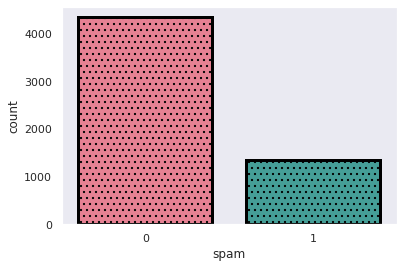

In [61]:
# Please insert your code here
sb.countplot(x="spam",data=mydata,palette="husl",lw=3,ec="black",hatch="..")


**Observations:**

*We can see that more number of data belongs to class 0 i.e not spam & very less number of data belongs to class 1 i.e spam.*

class[0]= 4350

class[1]= 1358

*So , therefore it is a imbalanced dataset. So this can give a biasedness towards class 0 which results in poor performance in predictiong class 1. So, we have to convert our imbalanced datset to balanced so that our classifiers can give an unbiased prediction.*

#**Section 2: Preprocessing **



### Task 1 (10 points):
1. Remove hyperlinks from text (2 points).
2.Remove all the punctuations from the text in dataset .

3.  Remove all numericals from text.

4. Convert all text in lower case.

5. Remove extra spaces from text.

6. Display any five rows of your dataframe on which above five operation are implemented.



In [62]:
# Please insert your code here
mydata['text'] = mydata['text'].str.replace('http\S+|www.\S+', '', case=False) #Remove hyperlinks
#case = false as it is case insensitive

In [63]:
# Please insert your code here
mydata['text'] = mydata['text'].str.replace('[^\w\s]+', '') #Remove Punctuations


In [64]:
# Please insert your code here
mydata['text'] = mydata['text'].str.replace('\d+', '') #Remove numericals

In [65]:
mydata['text'] = mydata['text'].str.lower() #Convert to lowercase

In [66]:
# Please insert your code here
mydata['text'] = mydata['text'].str.replace('  ', ' ') #Remove extra spaces

In [67]:
# Please insert your code here
print(mydata['text'].head(5))

0    subject naturally irresistible your corporate identity lt is really hard to recollect a company the market is full of suqgestions and the information isoverwhelminq but a good catchy logo stylish statlonery and outstanding website will make the task much easier  we do not promise that havinq ordered a iogo your company will automaticaily become a world ieader it isguite ciear that without good products effective business organization and practicable aim it will be hotat nowadays market but we do promise that your marketing efforts will become much more effective here is the list of clear benefits creativeness hand made original logos specially done to reflect your distinctive company image convenience logo and stationery are provided in all formats easy to use content management system letsyou change your website content and even its structure promptness you will see logo drafts within three business days affordability your marketing break through shouldn t make gaps in your budge

*As we can see that first 5 sentences have changed after the 5 operations*


### Task 2 (Word Stemming and Word lemmatization) (5 points):



**Word Stemming:** is a process of reducing a word to its word stem that affixes to suffixes and prefixes or to the roots of words known as a lemma.

**Word lemmatization:** is a process of utilizing the dictionary of a particular language and trying to convert the words back to its base form.

These techniques try to reduce the words to its most basic form.

You have to convert the text using stemming and lemmatization  and display five random examples of the converted text.



Hint: Implementation of these algorithms is available in nltk library.

In [68]:
# Please insert your code here
p=PorterStemmer()
lemmi=WordNetLemmatizer()
#mydata['text'].dropna(inplace=True)

mydata['text']=mydata['text'].apply(lambda l : filter(None,l.split(" "))) #split words
mydata['text']=mydata['text'].apply(lambda l : [p.stem(x) for x in l]) #Perform stemming
mydata['text']=mydata['text'].apply(lambda l : [lemmi.lemmatize(x) for x in l]) #Perform lemmatization
mydata['text']=mydata['text'].apply(lambda l : " ".join(l)) #Join words to make them into sentences

print(mydata['text'])


0       subject natur irresist your corpor ident lt is realli hard to recollect a compani the market is full of suqgest and the inform isoverwhelminq but a good catchi logo stylish statloneri and outstand websit will make the task much easier we do not promis that havinq order a iogo your compani will automaticaili becom a world ieader it isguit ciear that without good product effect busi organ and practic aim it will be hotat nowaday market but we do promis that your market effort will becom much more effect here is the list of clear benefit creativ hand made origin logo special done to reflect your distinct compani imag conveni logo and stationeri are provid in all format easi to use content manag system letsyou chang your websit content and even it structur prompt you will see logo draft within three busi day afford your market break through shouldn t make gap in your budget satisfact guarante we provid unlimit amount of chang with no extra fee for you to be surethat you will love t

#**Section 3: Vectorization (5 points)**

1. Convert text to numerical vectors (such as TF.IDF). You may use available library function for the same.

In [69]:
# Please insert your code here
tfidf= TfidfVectorizer()
mytfidf= tfidf.fit_transform(mydata['text'])
mydatatfidf=pd.DataFrame(mytfidf.toarray(), columns=tfidf.get_feature_names())
mydatatfidf

,aa,aaa,aaaenerfax,aadedeji,aagraw,aal,aaldou,aaliyah,aall,aanalysi,aaron,ab,aba,abacha,abacu,abahi,abaixo,abandon,abargain,abarr,abattoir,abb,abba,abbestellen,abbott,abbrevi,abc,abcsearch,abdalla,abdallat,abdelnour,abdul,abdulla,abdullah,abei,abel,abello,aber,abernathi,abet,...,zosta,zostal,zou,zrobic,zrobilem,zt,ztvwo,zu,zucha,zuerich,zufferli,zuid,zuli,zulkifli,zum,zuma,zunaechst,zunf,zungenakrobatik,zur,zurich,zusaetzlich,zustellstatu,zuyw,zuzana,zwabic,zwischen,zwlaszcza,zwrocic,zwwyw,zwzm,zxghlajf,zyban,zyc,zygoma,zymg,zzmacmac,zzn,zzncacst,zzzz
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5703,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5704,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5705,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5706,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#**Section 4: Splitting Data **

You have to divide the given dataset two parts called train and test data, in the ratio 80:20 i.e. train data will contain 80% of total dataset and test will contain 20% dataset. The distribution of spam and ham email in train and test should be balanced.

You have to use Random state : 42

In [70]:
# Please insert your code here
#BALANCING THE DATASET USING RandomOverSampler
ros =  RandomOverSampler(random_state=42) 
t=mydatatfidf
s=mydata['spam']
x_train, y_train = ros.fit_sample(t, s)
print('Original dataset shape {}'.format(Counter(s)))
print('Resampled dataset shape {}'.format(Counter(y_train)))


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Original dataset shape Counter({0: 4350, 1: 1358})
Resampled dataset shape Counter({1: 4350, 0: 4350})


*As we can see that after balancing both spam and ham total values have become equal to 4350. This gives us a balanced dataset*

In [71]:
xtrain, xtest, ytrain, ytest = train_test_split(x_train,y_train, test_size=0.2, random_state=42)
print("xtrain :",len(xtrain))
print("xtest :",len(xtest))
print("ytrain :",len(ytrain))
print("ytest :",len(ytest))


xtrain : 6960
xtest : 1740
ytrain : 6960
ytest : 1740


#**Section 5: Vector-distance based Spam Filter**


1. Implement the vector-distance based spam filter as discussed in the class (the method is described in the slides shared in the google classroom)

2. Report the accuracy, and f-measure. (Your can explore about accuracy and F-measure metrics here are some helpful links: 

Accuracy: https://en.wikipedia.org/wiki/Accuracy_and_precision#In_binary_classification

F-measure: https://en.wikipedia.org/wiki/F-score


3. Plot the confusion matrix.
https://en.wikipedia.org/wiki/Confusion_matrix

4. Comment on the classifier's performance

In [72]:
# Please insert your code here
#GET SPAM AND NONSPAM CLASSES
train_frame=pd.DataFrame(xtrain)
train_frame['spam']=ytrain
spam_d=train_frame[train_frame['spam'] == 1]
spam_d.drop('spam', inplace=True, axis=1)
spam_d=spam_d.to_numpy()
no_spam_d=train_frame[train_frame['spam'] == 0]
no_spam_d.drop('spam', inplace=True, axis=1)
no_spam_d=no_spam_d.to_numpy()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [73]:
#USE EUCLIDEAN DISTANCE TO FIND THE DISTANCE OF NEW MESSAGE FROM SPAM AND NONSPAM CLASSES
accuracy_data=[]
f1_data=[]
mypred=[]
def euclidean_distance(v1,v2):
  return np.linalg.norm(v1 - v2)

for x in xtest:
  spam_distances = [euclidean_distance(x,y) for y in spam_d]
  avg_spam=sum(spam_distances) / len(spam_distances) #FIND AVG OF SPAM DISTANCES
  non_spam_distances = [euclidean_distance(x,z) for z in no_spam_d]
  avg_no_spam=sum(non_spam_distances) / len(non_spam_distances) #FIND AVG OF NONSPAM DISTANCES
  if avg_spam < avg_no_spam:
    mypred.append(1) #IF AVG OF SPAM IS LESS, THEN ASSIGN CLASS 1
  else:
    mypred.append(0) #ELSE ASSIGN CLASS 0

mypred=np.array(mypred)
mypred

array([1, 0, 1, ..., 0, 0, 1])

In [74]:
accuracy_data.append(accuracy_score(ytest, mypred))
f1_data.append(f1_score(ytest,mypred))
print("Accuracy of Vector-distance based Spam Filter: ",accuracy_score(ytest,mypred))
print("f-measure of Vector-distance based Spam Filter: ",f1_score(ytest,mypred))
print(classification_report(ytest,mypred))


Accuracy of Vector-distance based Spam Filter:  0.9051724137931034
f-measure of Vector-distance based Spam Filter:  0.896291640477687
              precision    recall  f1-score   support

           0       0.84      0.99      0.91       868
           1       0.99      0.82      0.90       872

    accuracy                           0.91      1740
   macro avg       0.92      0.91      0.90      1740
weighted avg       0.92      0.91      0.90      1740



Confusion Matrix:
 [[862   6]
 [159 713]]


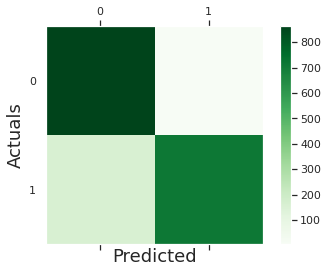

In [75]:
conf=confusion_matrix(ytest,mypred)
print("Confusion Matrix:\n",conf)
mylabel = ['Class 0', 'Class 1']
fig = plt.figure()
fas = fig.add_subplot(111)
fm = fas.matshow(conf, cmap=plt.cm.Greens)
fig.colorbar(fm)
plt.ylabel('Actuals',fontsize=18)
plt.xlabel('Predicted',fontsize=18)
plt.show()

**OBSERVATIONS:**

*Accuracy of Vector-distance based Spam Filter is 0.905. This means that approx 90.5% of our predictions were right for both spam and ham*

*Precision for class 0 is 0.84. This means that out of all the ham predictions 84% were actually ham.*

*Precision for class 1 is 0.99. This means that out of all the spam predictions 99% were actually spam.*

*Recall of class 0 is 0.99. This means that out of all the actual hams 99% were predcited hams.*

*Recall of class 1 is 0.82. This means that out of all the actual spams 82% were predcited spams.*

*With the help of confusion matrix we can see that out of actual 868 hams 862 were predicted hams and 6 were predicted spams and out of actual 872 spams 159 were predcited hams and 713 were predicted spams.*

*f-measure of Vector-distance based Spam Filter is 0.896*

**Vector-distance based Spam Filter predicts a lot of actual spams as ham so we get low precision for ham and low recall for spam.**




#**Section 6: Naiive Bayes **


1. Apply Naive Bayes classifier to classify Spam/ham.

2. Report the accuracy, and f-measure.

3. Plot the confusion matrix.

4. Comment on the classifier's performance



In [76]:
# Please insert your code here
nabayes = MultinomialNB()
nabayes.fit(xtrain, ytrain)
nabayes_p = nabayes.predict(xtest)
accuracy_data.append(accuracy_score(ytest, nabayes_p))
f1_data.append(f1_score(ytest,nabayes_p))
print("Accuracy of Naiive Bayes: ",accuracy_score(ytest,nabayes_p))
print("f-measure of Naiive Bayes: ",f1_score(ytest,nabayes_p))
print(classification_report(ytest,nabayes_p))

Accuracy of Naiive Bayes:  0.9948275862068966
f-measure of Naiive Bayes:  0.9948364888123924
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       868
           1       1.00      0.99      0.99       872

    accuracy                           0.99      1740
   macro avg       0.99      0.99      0.99      1740
weighted avg       0.99      0.99      0.99      1740



Confusion Matrix:
 [[864   4]
 [  5 867]]


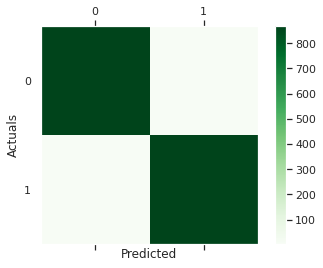

In [77]:
conf=confusion_matrix(ytest,nabayes_p)
print("Confusion Matrix:\n",conf)
mylabel = ['Class 0', 'Class 1']
fig = plt.figure()
fas = fig.add_subplot(111)
fm = fas.matshow(conf, cmap=plt.cm.Greens)
fig.colorbar(fm)
plt.ylabel('Actuals')
plt.xlabel('Predicted')
plt.show()

**OBSERVATIONS:**

*Accuracy of Naiive Bayes is 0.995. This means that approx 99.5% of our predictions were right for both spam and ham*

*Precision for class 0 is 0.99. This means that out of all the ham predictions 99% were actually ham.*

*Precision for class 1 is 1. This means that out of all the spam predictions approx. all were spam.*

*Recall of class 0 is 1. This means that out of all the actual hams approx all were predcited hams.*

*Recall of class 1 is 0.99. This means that out of all the actual spams 99% were predcited spams.*

*With the help of confusion matrix we can see that out of actual 868 hams 864 were predicted hams and 4 were predicted spams and out of actual 872 spams 5 were predcited hams and 867 were predicted spams.*

*f-measure of Naiive Bayes is approx 0.995*

**Naiive Bayes performs good prediction on both actual hams and actual spams.**

#**Section 7: Decision Tree **
1. Apply Decision Tree Algorithm

2. Report the accuracy, and f-measure.

3. Plot the confusion matrix.

4. Comment on the classifier's performance

In [78]:
# Please insert your code here
dect=DecisionTreeClassifier(random_state=42)
dect.fit(xtrain, ytrain)
dect_p=dect.predict(xtest)
accuracy_data.append(accuracy_score(ytest, dect_p))
f1_data.append(f1_score(ytest,dect_p))
print("Accuracy of Decison Tree: ",accuracy_score(ytest,dect_p))
print("f-measure of Decison Tree: ",f1_score(ytest,dect_p))
print(classification_report(ytest,dect_p))


Accuracy of Decison Tree:  0.9781609195402299
f-measure of Decison Tree:  0.9784824462061155
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       868
           1       0.97      0.99      0.98       872

    accuracy                           0.98      1740
   macro avg       0.98      0.98      0.98      1740
weighted avg       0.98      0.98      0.98      1740



Confusion Matrix:
 [[838  30]
 [  8 864]]


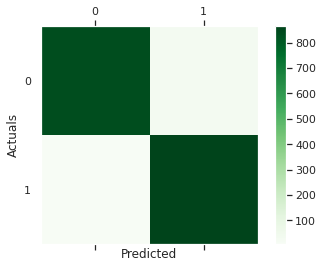

In [79]:
conf=confusion_matrix(ytest,dect_p)
print("Confusion Matrix:\n",conf)
mylabel = ['Class 0', 'Class 1']
fig = plt.figure()
fas = fig.add_subplot(111)
fm = fas.matshow(conf, cmap=plt.cm.Greens)
fig.colorbar(fm)
plt.ylabel('Actuals')
plt.xlabel('Predicted')
plt.show()

**OBSERVATIONS:**

*Accuracy of Decision Tree is approx 0.978. This means that approx 97.8% of our predictions were right for both spam and ham*

*Precision for class 0 is 0.99. This means that out of all the ham predictions 99% were actually ham.*

*Precision for class 1 is 0.97. This means that out of all the spam predictions 97% were actually spam.*

*Recall of class 0 is 0.97. This means that out of all the actual hams 97% were predcited hams.*

*Recall of class 1 is 0.99. This means that out of all the actual spams 99% were predcited spams.*

*With the help of confusion matrix we can see that out of actual 868 hams 838 were predicted hams and 30 were predicted spams and out of actual 872 spams 8 were predcited hams and 864 were predicted spams.*

*f-measure of Decision Tree is approx 0.978*

**Decision Tree predicts 30 actual hams as spams so it gives slight low precision for spams and low recall for hams.**


#**Section 8: Support Vector Machine **

You have to use "linear" kernel.


1. Apply Support Vector Machine (SVM) algorithm

2. Report the accuracy, and f-measure.

3. Plot the confusion matrix.

4. Comment on the classifier's performance


In [80]:
# Please insert your code here
sup=SVC(kernel='linear',random_state=42)
sup.fit(xtrain, ytrain)
sup_p=sup.predict(xtest)
accuracy_data.append(accuracy_score(ytest, sup_p))
f1_data.append(f1_score(ytest,sup_p))
print("Accuracy of Support Vector Machine: ",accuracy_score(ytest,sup_p))
print("f-measure of Support Vector Machine: ",f1_score(ytest,sup_p))
print(classification_report(ytest,sup_p))

Accuracy of Support Vector Machine:  0.9982758620689656
f-measure of Support Vector Machine:  0.998282770463652
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       868
           1       1.00      1.00      1.00       872

    accuracy                           1.00      1740
   macro avg       1.00      1.00      1.00      1740
weighted avg       1.00      1.00      1.00      1740



Confusion Matrix:
 [[865   3]
 [  0 872]]


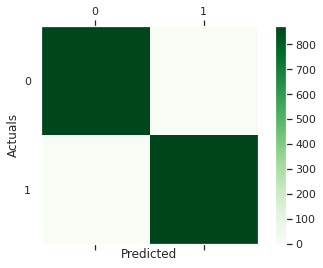

In [81]:
conf=confusion_matrix(ytest,sup_p)
print("Confusion Matrix:\n",conf)
mylabel = ['Class 0', 'Class 1']
fig = plt.figure()
fas = fig.add_subplot(111)
fm = fas.matshow(conf, cmap=plt.cm.Greens)
fig.colorbar(fm)
plt.ylabel('Actuals')
plt.xlabel('Predicted')
plt.show()


**OBSERVATIONS:**

*Accuracy of Support Vector Machine is approx 0.998. This means that approx 99.8% of our predictions were right for both spam and ham*

*Precision for class 0 is 1. This means that out of all the ham predictions approx. all were actually ham.*

*Precision for class 1 is 1. This means that out of all the spam predictions approx. all were actually spam.*

*Recall of class 0 is 1. This means that out of all the actual hams approx. all were predcited hams.*

*Recall of class 1 is 1. This means that out of all the actual spams approx. all were predcited spams.*

*With the help of confusion matrix we can see that out of actual 868 hams 865 were predicted hams and 3 were predicted spams and out of actual 872 spams none were predcited hams and all 872 were predicted spams.*

*f-measure of Support Vector Machine is approx 0.998*

**Support Vector Machine performs exceptionally well. It predicts all the actual spams correctly and predicts only 3 actual hams as spams.**

#**Section 9: Compare all the classifiers' performances using graphs/plots and write your observations **

In [82]:
#Insert code here
algos=['Vector-distance based Spam Filter','Naiive Bayes','Decision Tree','Support Vector Machine']
table=pd.DataFrame()
table['classifiers']=algos
table['Accuracy']=accuracy_data
table['f-measure']=f1_data
table

,classifiers,Accuracy,f-measure
0,Vector-distance based Spam Filter,0.905172,0.896292
1,Naiive Bayes,0.994828,0.994836
2,Decision Tree,0.978161,0.978482
3,Support Vector Machine,0.998276,0.998283


In [83]:
color=sb.light_palette("green",as_cmap=True)
color2=sb.light_palette("red",as_cmap=True)
table2=table.style.background_gradient(cmap=color,subset=['Accuracy']).background_gradient(cmap=color2,subset=['f-measure'])
table2

,classifiers,Accuracy,f-measure
0,Vector-distance based Spam Filter,0.905172,0.896292
1,Naiive Bayes,0.994828,0.994836
2,Decision Tree,0.978161,0.978482
3,Support Vector Machine,0.998276,0.998283


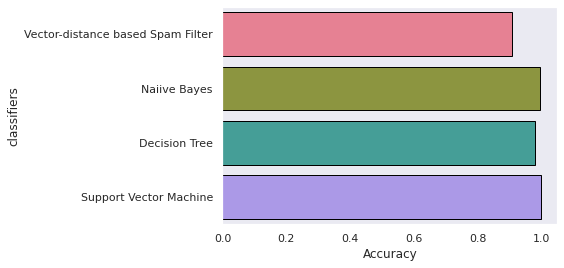

In [84]:
sb.set(style="dark")
pl1=sb.barplot(y="classifiers",x="Accuracy",data=table,palette="husl",ec="black")

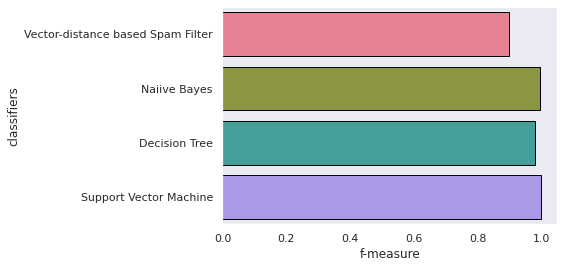

In [85]:
pl1=sb.barplot(y="classifiers",x="f-measure",data=table,palette="husl",ec="black")

**OBSERVATIONS:**

1.Support Vector machine gives the highest accuracy and f-measure.

2.Support Vector machine performs slightly better than Naiive Bayes. So, Naiive Bayes performs second best.

3.Support Vector machine and Naiive Bayes also give high precisions and recalls.

4.Out of vector-distance based and Decision tree, Decision tree performs better.

5.Vector-distance based Spam Filter predicts a lot of actual spams as ham so we get low precision for ham and low recall for spam. That is why Vector-distance based spam filter lags behind.
